# The Titanic's Tale: Insights from Data Analysis


## Data analysis


* The process of data analysis includes exploring, cleaning, transforming, and modeling data to discover insights and patterns that facilitate decision-making, problem resolution, or the construction of predictive models.

* Before starting analysis, first let us understand what’s inside Titanic dataset, which means the fields(rows).


* It contains information about the passengers aboard the Titanic, which sank on its maiden voyage in `1912` after colliding with an iceberg. The dataset includes `891` rows and `12` columns,

* The columns present in the Titanic dataset are:

`PassengerId:` This column contains a unique identifier for each passenger.

`Survived:` This column contains information about whether a passenger survived the sinking or not. The value 0 indicates that the passenger did not survive, while the value 1 indicates that the passenger did survive.

`Pclass:` This column contains information about the passenger’s class. The value 1 indicates first class, the value 2 indicates second class, and the value 3 indicates third class.

`Name:` This column contains the name of the passenger.

`Sex:` This column contains information about the passenger’s gender.

`Age:` This column contains the age of the passenger.

`SibSp:` This column contains information about the passenger’s siblings and spouse.

`Parch:` This column contains information about the passenger’s parents and children.

`Ticket:` This column contains the ticket number of the passenger.

`Fare:` This column contains the fare paid by the passenger.

`Cabin:` This column contains the cabin number of the passenger.

`Embarked:` This column contains information about the port of embarkation. The value `C` indicates `Cherbourg`, the value `Q` indicates `Queenstown`, and the value `S` indicates `Southampton`

###### For titanic data set, we find the survivors by corelating with various columns.



**1. What was the survival rate for men and women?** 

**2. Did passengers in first class have a higher survival rate than those in second or third class?** 

**3. Did age play a role in survival rate?**  

**4. Did having family members on board affect a passenger’s survival rate?**  

**5. Were passengers with a higher fare more likely to survive?**  

**6. What was the distribution of passengers’ ages on the Titanic?** 

**7. What was the distribution of passengers’ fares on the Titanic?**  

**8. What was the distribution of passengers’ cabin locations on the Titanic?**  

**9. Did the location of a passenger’s cabin on the ship affect their survival rate?**

And so on.


### Lets import the packages and dataset first
Let's start:

In [1]:
#package for for data analysis and manipulation
import pandas as pd 
#for array operations such as reshaping, slicing, indexing
import numpy as np
#advanced visualization
import seaborn as sns
#fundamental visualization
import matplotlib.pyplot as plt 
#for inline plotting of Matplotlib figures within a Jupyter Notebook.
%matplotlib inline 

#importing the dataset
titanic_df = pd.read_csv('train.csv')
#to display first 5 rows in dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Let’s count the null values



In [2]:
#to count the null values in each columns
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Let’s count te survived and non survived count values.

# Count the number of survivors and non-survivors in the dataset


In [3]:
# Count the number of survivors and non-survivors in the dataset
survived_counts = titanic_df["Survived"].value_counts()
print(survived_counts)

Survived
0    549
1    342
Name: count, dtype: int64


### Let’s plot the barchart and piechart for the output



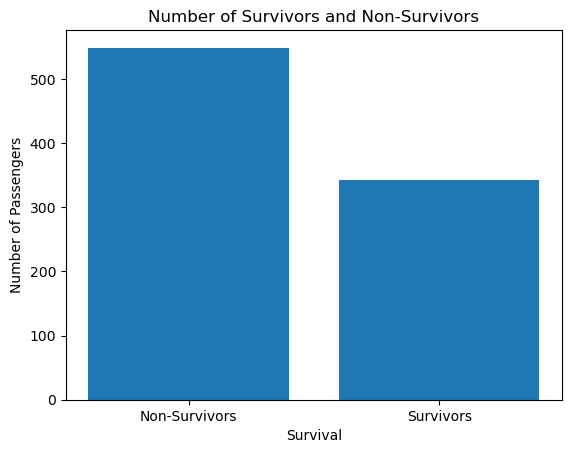

In [4]:
# Plot a bar chart of the number of survivors and non-survivors
plt.bar(survived_counts.index, survived_counts.values)
plt.xticks([0, 1], ["Non-Survivors", "Survivors"])
plt.xlabel("Survival")
plt.ylabel("Number of Passengers")
plt.title("Number of Survivors and Non-Survivors")
plt.show()

**To draw a bar chart count is enough, but to draw a pie chart we need percentage too**

Overall Survival Rate: 38.38 %


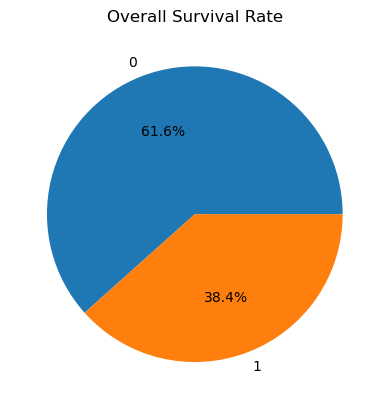

In [26]:
# Calculate the overall survival rate
survival_rate = titanic_df['Survived'].mean()
print('Overall Survival Rate:', round(survival_rate * 100, 2), '%')

#let's plot a piechart
# Plot a pie chart of the overall survival rate
plt.pie(survived_counts.values, labels=survived_counts.index, autopct="%1.1f%%")
plt.title("Overall Survival Rate")
plt.show()

Let us start with next Column — **Gender**

**Count the male and female, their percentage and plot the bar and piechart as same as above.**

In [6]:
# Count the number of males and females in the dataset
sex_counts = titanic_df["Sex"].value_counts()
print(sex_counts)

Sex
male      577
female    314
Name: count, dtype: int64


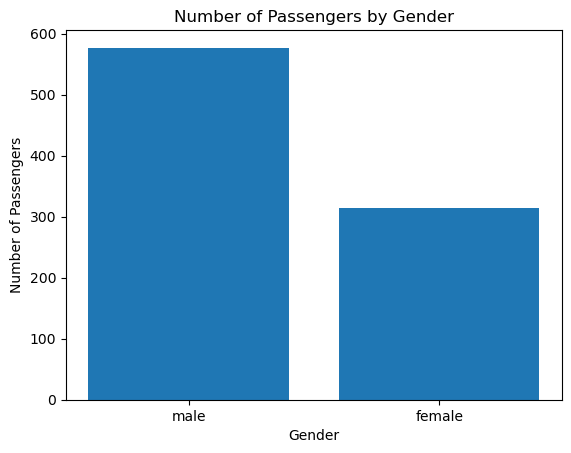

In [7]:
# Plot a bar chart of the number of male and female passengers
plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers by Gender")
plt.show()

In [8]:
# Calculate the percentage of males and females
total_passengers = len(titanic_df)
male_percent = (sex_counts["male"] / total_passengers) * 100
female_percent = (sex_counts["female"] / total_passengers) * 100
print("Male percentage:", round(male_percent, 2), "%")
print("Female percentage:", round(female_percent, 2), "%")

Male percentage: 64.76 %
Female percentage: 35.24 %


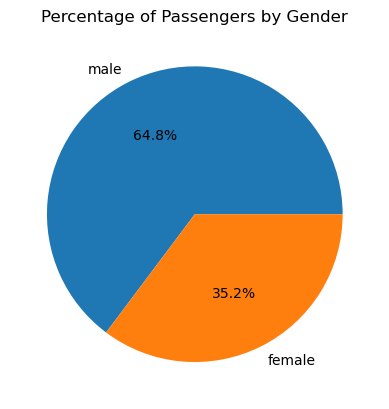

In [9]:
# Plot a pie chart of the percentage of male and female passengers
plt.pie(sex_counts.values, labels= sex_counts.index, autopct="%1.1f%%")
plt.title("Percentage of Passengers by Gender")
plt.show()

In [10]:
# Group the data by sex and survival
sex_survival_groups = titanic_df.groupby(['Sex', 'Survived'])

# Count the number of survivors and non-survivors by sex
sex_survival_counts = sex_survival_groups.size()

# Extract the counts of male and female survivors and non-survivors
male_counts = sex_survival_counts['male']
female_counts = sex_survival_counts['female']

male_survived = male_counts[1]
male_not_survived = male_counts[0]

female_survived = female_counts[1]
female_not_survived = female_counts[0]

# Print the results
print("Male Survivors: ", male_survived)
print("Male Non-Survivors: ", male_not_survived)
print("Female Survivors: ", female_survived)
print("Female Non-Survivors: ", female_not_survived)


Male Survivors:  109
Male Non-Survivors:  468
Female Survivors:  233
Female Non-Survivors:  81


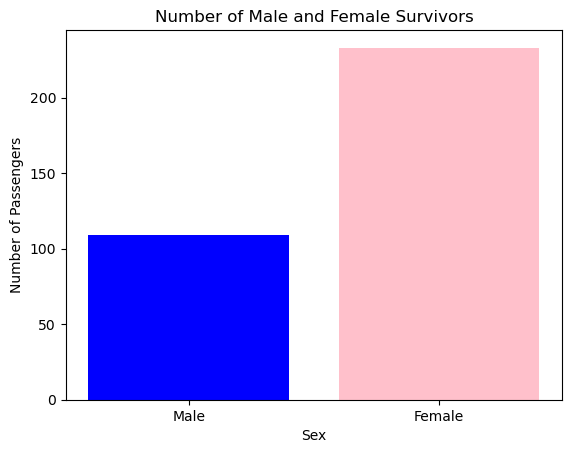

In [11]:
# Plot a bar chart of the number of male and female survivors
plt.bar(['Male', 'Female'], [male_survived, female_survived], color=['blue', 'pink'])
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.title("Number of Male and Female Survivors")
plt.show()


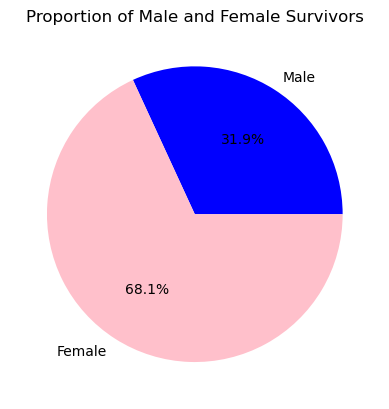

In [12]:
# Plot a pie chart of the number of male and female survivors
plt.pie([male_survived, female_survived], labels=['Male', 'Female'], autopct="%1.1f%%", colors=['blue', 'pink'])
plt.title("Proportion of Male and Female Survivors")
plt.show()

It’s the time to explore our next Column — **Pclass**

**Here we will first find no. of classes, how many are there in each class and survival rate at each class**

In [27]:
# Count the number of classes
num_classes = len(titanic_df["Pclass"].unique())


# Count the number of passengers in each class
class_counts = titanic_df["Pclass"].value_counts()

# Calculate the percentage of passengers in each class
class_percents = (class_counts / titanic_df["Pclass"].count()) * 100
# Print the results
print("Number of Classes: ", num_classes)
print("Class Counts: \n", class_counts)
print("Class Percents: \n", class_percents)

Number of Classes:  3
Class Counts: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Class Percents: 
 Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


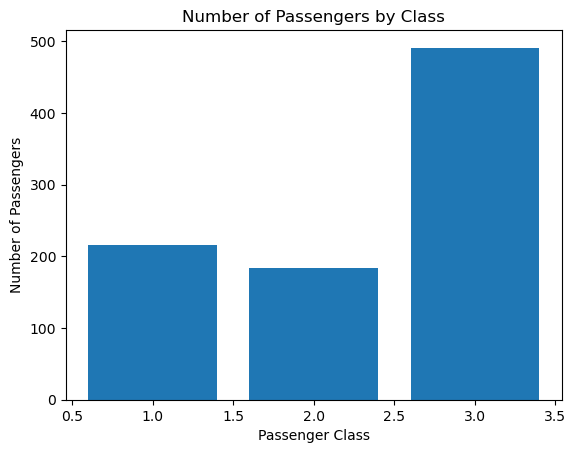

In [14]:
# Plot a bar chart of the number of passengers in each class
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers by Class")
plt.show()

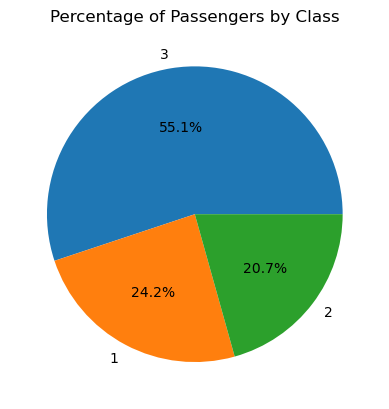

In [28]:
# Plot a pie chart of the percentage of passengers in each class
plt.pie(class_percents.values, labels=class_percents.index, autopct="%1.1f%%")
plt.title("Percentage of Passengers by Class")
plt.show()

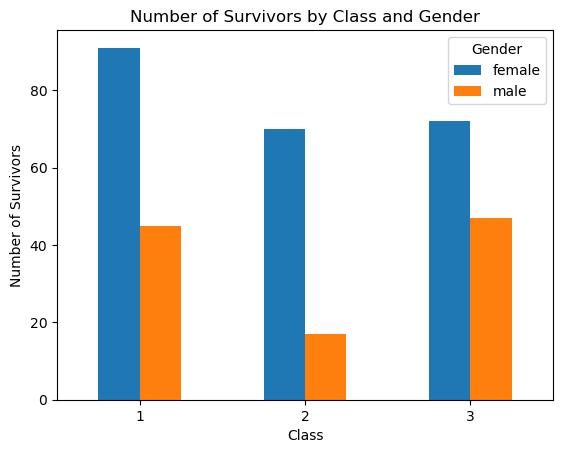

In [16]:
# Group the data by class and gender and calculate the count of survivors
survivors_by_class_gender = titanic_df.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Count')

# Filter the data for only survivors
survivors_by_class_gender = survivors_by_class_gender[survivors_by_class_gender['Survived'] == 1]

# Pivot the data to create separate columns for male and female survivors
survivors_by_class_gender_pivot = survivors_by_class_gender.pivot(index='Pclass', columns='Sex', values='Count')

# Plot the bar chart
survivors_by_class_gender_pivot.plot(kind='bar', rot=0)
plt.title('Number of Survivors by Class and Gender')
plt.xlabel('Class')
plt.ylabel('Number of Survivors')
plt.legend(title='Gender')
plt.show()


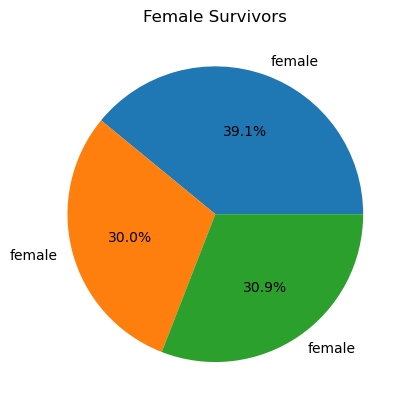

In [17]:
# Plot the pie chart for female survivors
female_survivors = survivors_by_class_gender[survivors_by_class_gender['Sex'] == 'female']
plt.pie(female_survivors['Count'], labels=female_survivors['Sex'], autopct='%1.1f%%')
plt.title('Female Survivors')
plt.show()

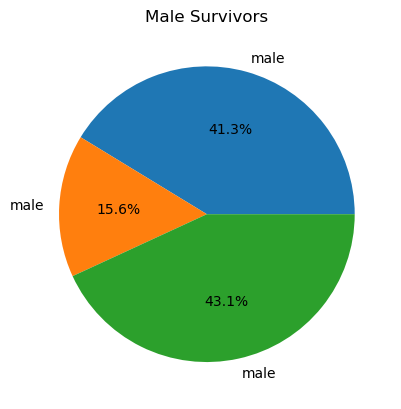

In [18]:
# Plot the pie chart for male survivors
male_survivors = survivors_by_class_gender[survivors_by_class_gender['Sex'] == 'male']
plt.pie(male_survivors['Count'], labels=male_survivors['Sex'], autopct='%1.1f%%')
plt.title('Male Survivors')
plt.show()

**It’s the Time for next Column — Age**

Let us find the age and sex of who survived through a graph for driving an outcome through analysis

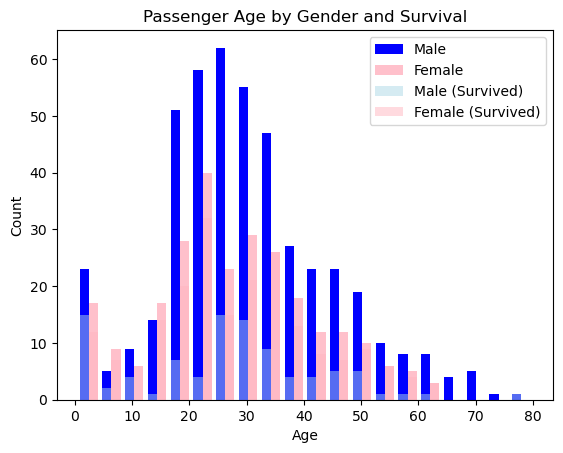

In [29]:
# create a new DataFrame with only age, sex, and survival columns
age_sex_survived_df = titanic_df[['Age', 'Sex', 'Survived']].dropna()

# separate the data into males and females
male_age = age_sex_survived_df[age_sex_survived_df['Sex'] == 'male']['Age']
female_age = age_sex_survived_df[age_sex_survived_df['Sex'] == 'female']['Age']

# separate the data into those who survived and those who did not
male_survived = age_sex_survived_df[(age_sex_survived_df['Sex'] == 'male') & (age_sex_survived_df['Survived'] == 1)]['Age']
female_survived = age_sex_survived_df[(age_sex_survived_df['Sex'] == 'female') & (age_sex_survived_df['Survived'] == 1)]['Age']

# plot the histograms
plt.hist([male_age, female_age], bins=20, label=['Male', 'Female'], color=['blue', 'pink'])
plt.hist([male_survived, female_survived], bins=20, label=['Male (Survived)', 'Female (Survived)'], color=['lightblue', 'lightpink'], alpha=0.5)

plt.title('Passenger Age by Gender and Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

**It’s the time for next column — SibSp column**

let’s find the survival rate in coherence with SibSp column.

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


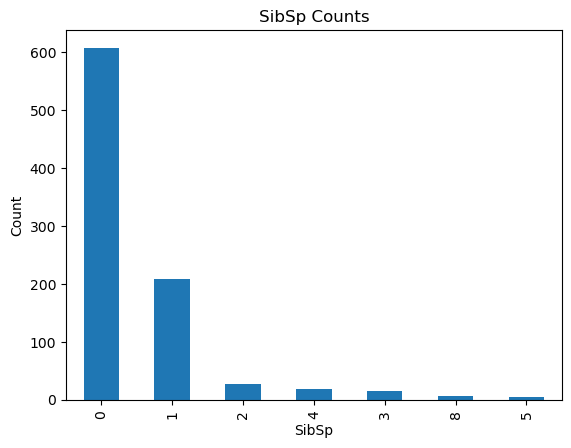

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


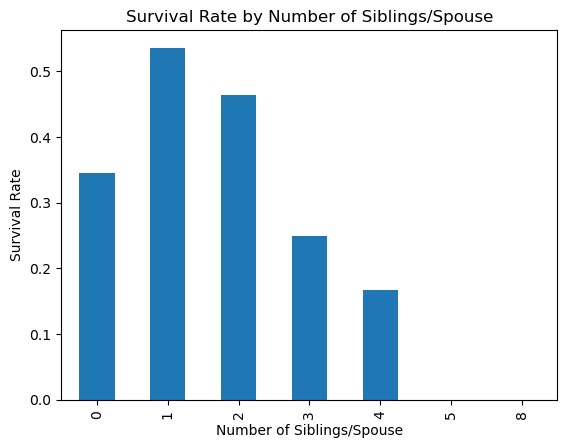

In [20]:
# count the number of occurrences of each unique value in the SibSp column - 0,1,2,3,4,5
sibsp_counts = titanic_df['SibSp'].value_counts()
# print the counts
print(sibsp_counts)


# create a bar chart of the SibSp counts
sibsp_counts.plot(kind='bar')
# set the chart title and axis labels
plt.title('SibSp Counts')
plt.xlabel('SibSp')
plt.ylabel('Count')
# display the chart
plt.show()

# Calculate the survival rate of passengers based on the number of siblings and spouses
sibsp_survival_rate = titanic_df.groupby('SibSp')['Survived'].mean()
print(sibsp_survival_rate)
sibsp_survival_rate = titanic_df.groupby('SibSp')['Survived'].mean()
print(sibsp_survival_rate)

sibsp_survival_rate.plot.bar()
plt.title('Survival Rate by Number of Siblings/Spouse')
plt.xlabel('Number of Siblings/Spouse')
plt.ylabel('Survival Rate')
plt.show()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


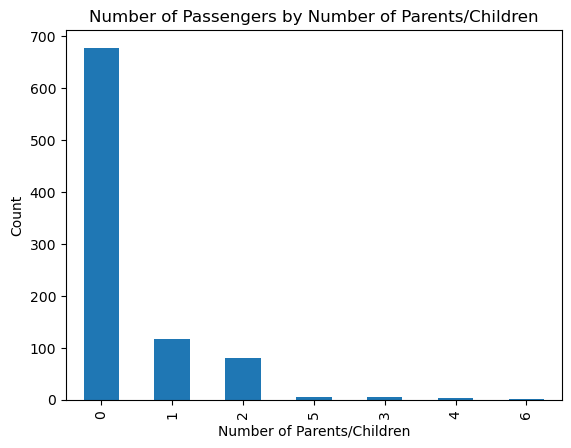

Parch               0     1     2    3    4    5    6
Survived Label                                       
Died            445.0  53.0  40.0  2.0  4.0  4.0  1.0
Survived        233.0  65.0  40.0  3.0  NaN  1.0  NaN


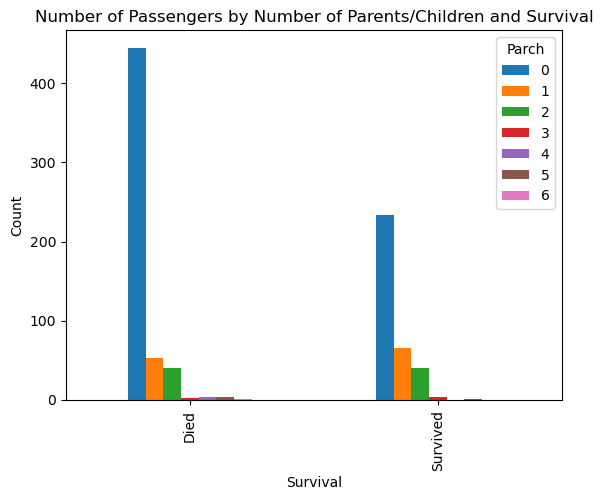

In [21]:
parch_counts = titanic_df['Parch'].value_counts()
print(parch_counts)

parch_counts.plot.bar()
plt.title('Number of Passengers by Number of Parents/Children')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.show()

titanic_df['Survived Label'] = titanic_df['Survived'].map({0: 'Died', 1: 'Survived'})

parch_survived = pd.pivot_table(titanic_df, values='PassengerId', index='Survived Label', columns='Parch', aggfunc='count')
print(parch_survived)

parch_survived.plot.bar()
plt.title('Number of Passengers by Number of Parents/Children and Survival')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

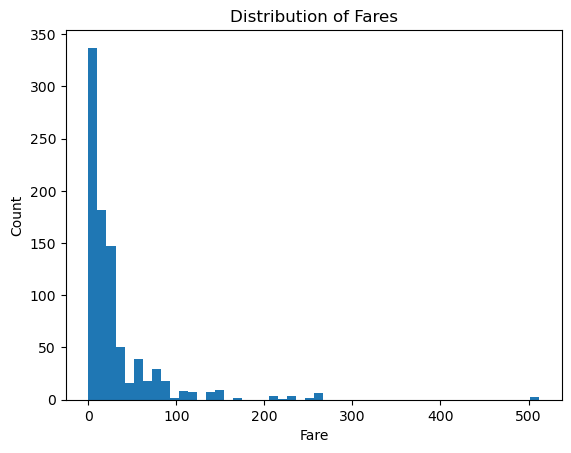

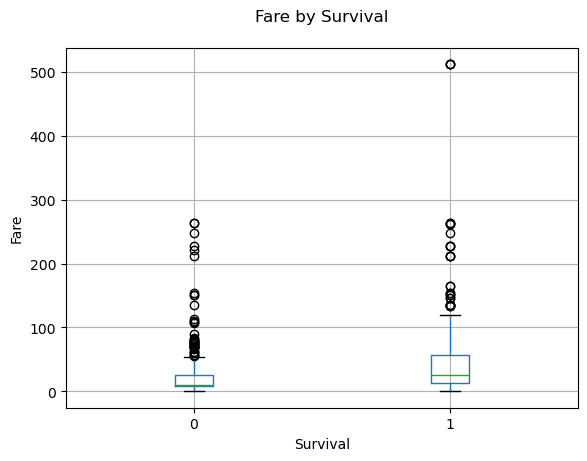

In [22]:
# Histogram of Fare column
plt.hist(titanic_df["Fare"], bins=50)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Distribution of Fares")
plt.show()
# Box plot of Fare by survival
titanic_df.boxplot(column="Fare", by="Survived")
plt.title("")
plt.suptitle("Fare by Survival")
plt.xlabel("Survival")
plt.ylabel("Fare")
plt.show()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


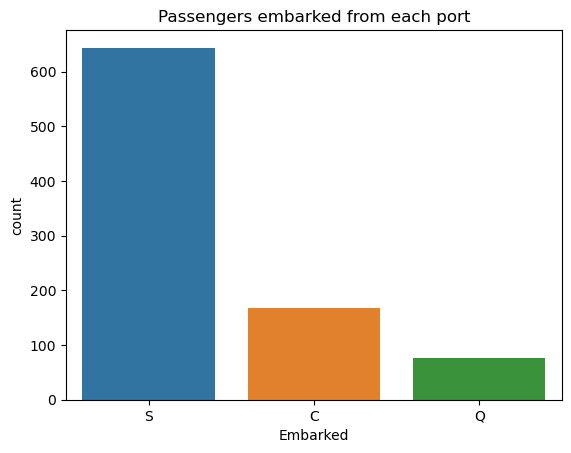

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


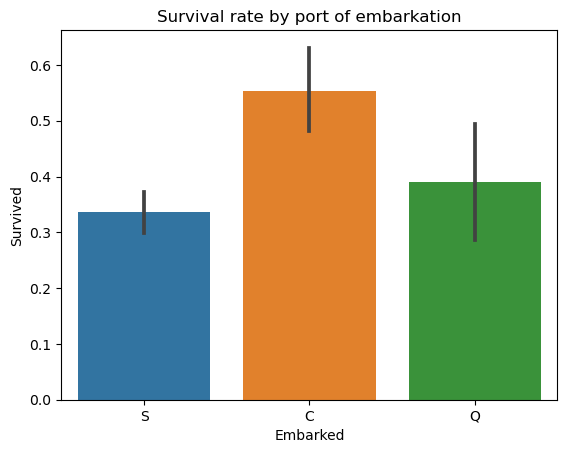

In [30]:
embarked_counts = titanic_df["Embarked"].value_counts()
print(embarked_counts)

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Embarked", data=titanic_df)
plt.title("Passengers embarked from each port")
plt.show()

survived_by_embarked = titanic_df.groupby("Embarked")["Survived"].mean()
print(survived_by_embarked)

sns.barplot(x="Embarked", y="Survived", data=titanic_df)
plt.title("Survival rate by port of embarkation")
plt.show()

In [24]:
# Find rows for Jack and Rose
jack = titanic_df.loc[(titanic_df['Name'].str.contains('Jack')) & (titanic_df['Sex'] == 'male')]
rose = titanic_df.loc[(titanic_df['Name'].str.contains('Rose')) & (titanic_df['Sex'] == 'female')]

# Print the rows for Jack and Rose
print("Jack's row:")
print(jack)

print("\nRose's row:")
print(rose)
#Here, we are using the loc method to select rows from the titanic_df DataFrame that meet certain criteria. Specifically, we are looking for rows where the Name column contains the string "Jack" and where the Sex column is "male" (for Jack's row), and where the Name column contains the string "Rose" and where the Sex column is "female" (for Rose's row).

#Once we have found the rows for Jack and Rose, we print them out using the print function.


Jack's row:
     PassengerId  Survived  Pclass                       Name   Sex  Age  \
766          767         0       1  Brewe, Dr. Arthur Jackson  male  NaN   

     SibSp  Parch  Ticket  Fare Cabin Embarked Survived Label  
766      0      0  112379  39.6   NaN        C           Died  

Rose's row:
     PassengerId  Survived  Pclass                        Name     Sex   Age  \
855          856         1       3  Aks, Mrs. Sam (Leah Rosen)  female  18.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked Survived Label  
855      0      1  392091  9.35   NaN        S       Survived  


# The End 